In [7]:
import pandas as pd
from ydata_profiling import ProfileReport
df = pd.read_csv("base_trie.csv")





In [8]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [9]:
df.describe()

,Quantity,Price,Customer ID
count,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777
std,191.670371,71.392549,1696.466663
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13964.000000
50%,5.000000,1.950000,15228.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.shape

(797885, 8)

In [37]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797885 entries, 0 to 797884
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 48.7+ MB


Résumé pour la colonne 'Invoice':
count     797885
unique     44876
top       576339
freq         542
Name: Invoice, dtype: object
---------------------------------------------


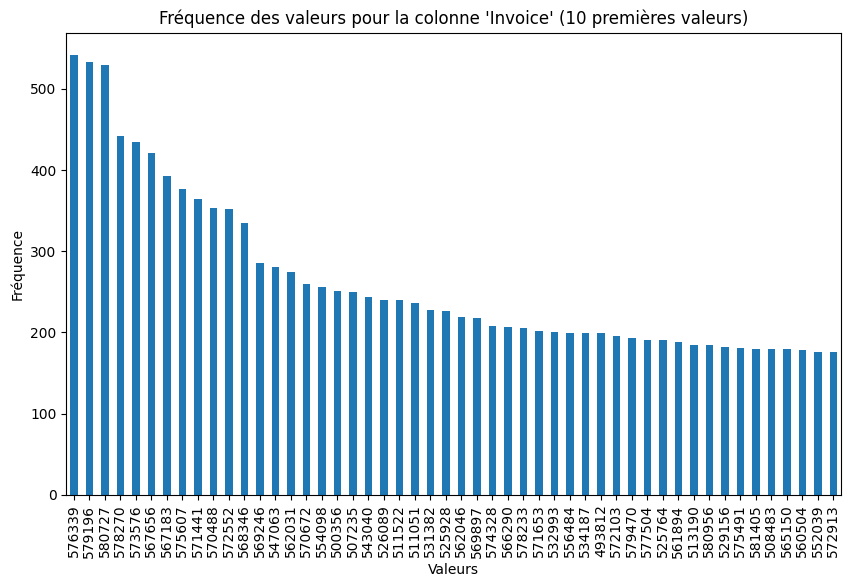

Résumé pour la colonne 'StockCode':
count     797885
unique      4646
top       85123A
freq        5156
Name: StockCode, dtype: object
---------------------------------------------


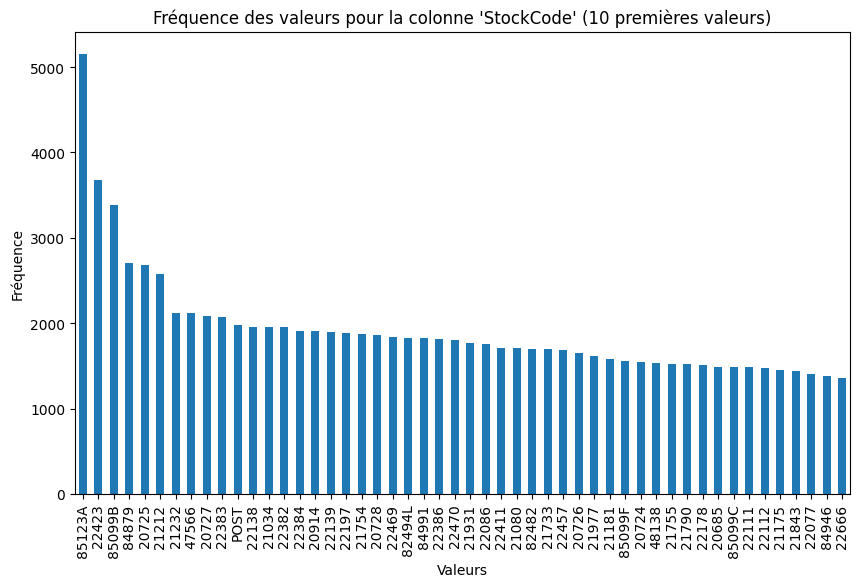

Résumé pour la colonne 'Description':
count                                 797885
unique                                  5299
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    5149
Name: Description, dtype: object
---------------------------------------------


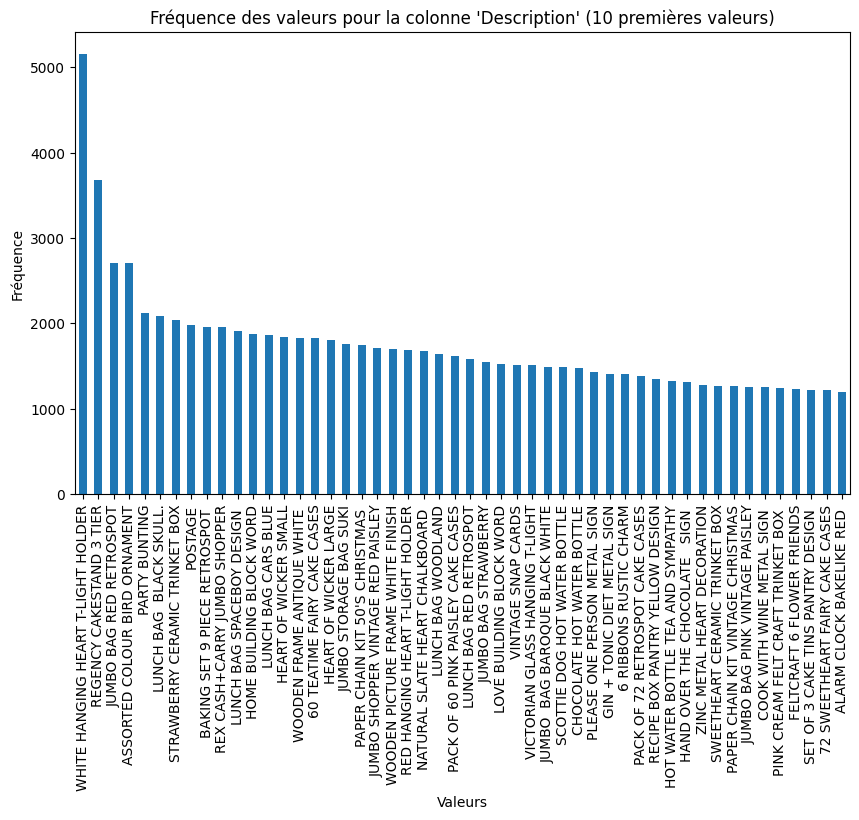

Résumé pour la colonne 'Quantity':
count    797885.000000
mean         12.602980
std         191.670371
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64
---------------------------------------------


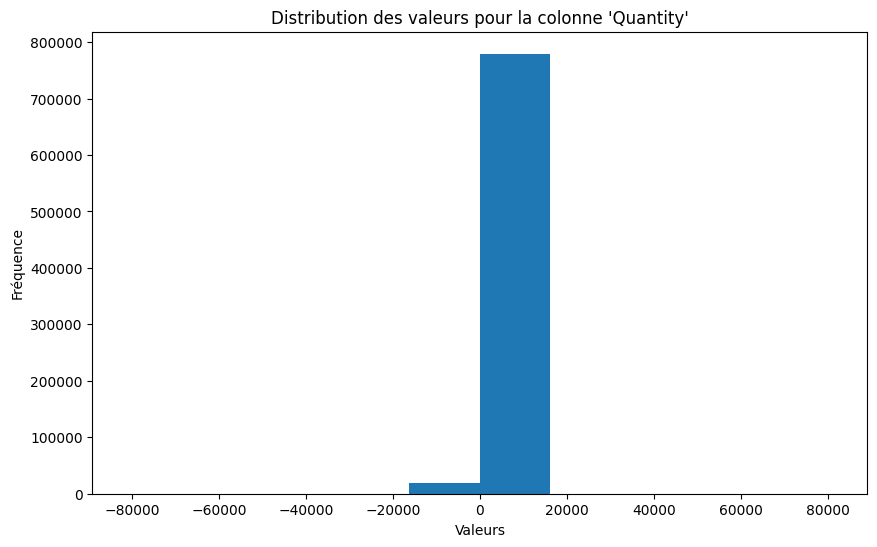

Résumé pour la colonne 'InvoiceDate':
count                  797885
unique                  41439
top       2011-11-14 15:27:00
freq                      543
Name: InvoiceDate, dtype: object
---------------------------------------------


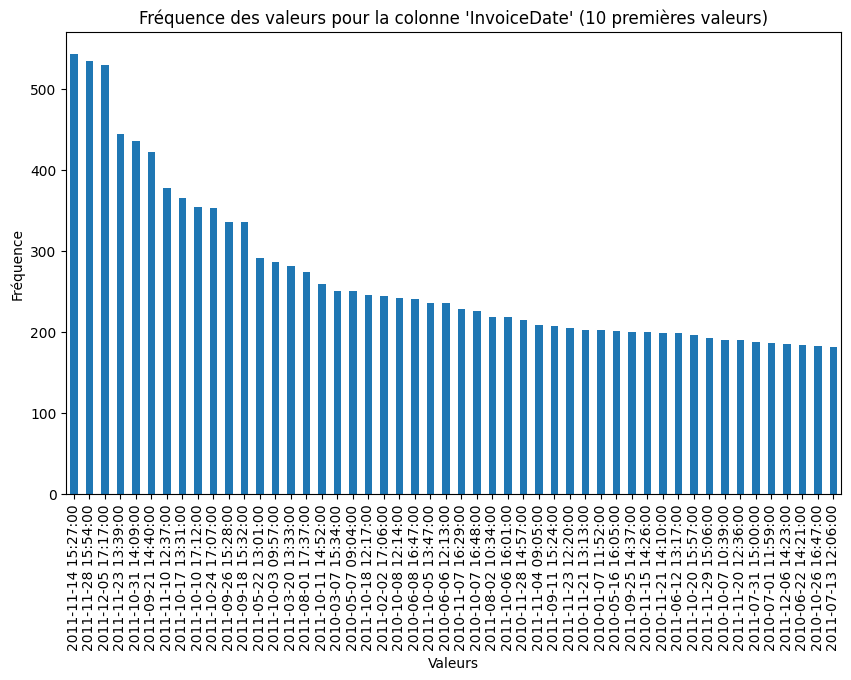

Résumé pour la colonne 'Price':
count    797885.000000
mean          3.702732
std          71.392549
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: Price, dtype: float64
---------------------------------------------


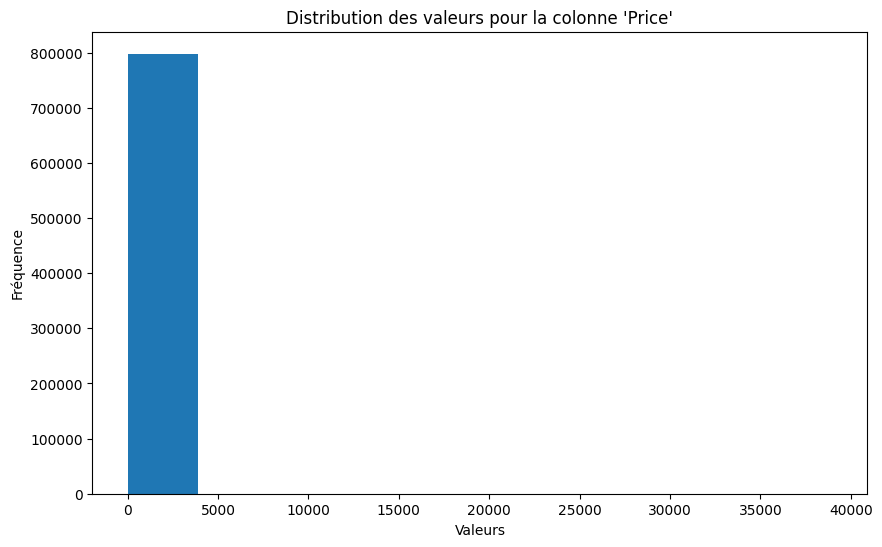

Résumé pour la colonne 'Customer ID':
count    797885.000000
mean      15313.062777
std        1696.466663
min       12346.000000
25%       13964.000000
50%       15228.000000
75%       16788.000000
max       18287.000000
Name: Customer ID, dtype: float64
---------------------------------------------


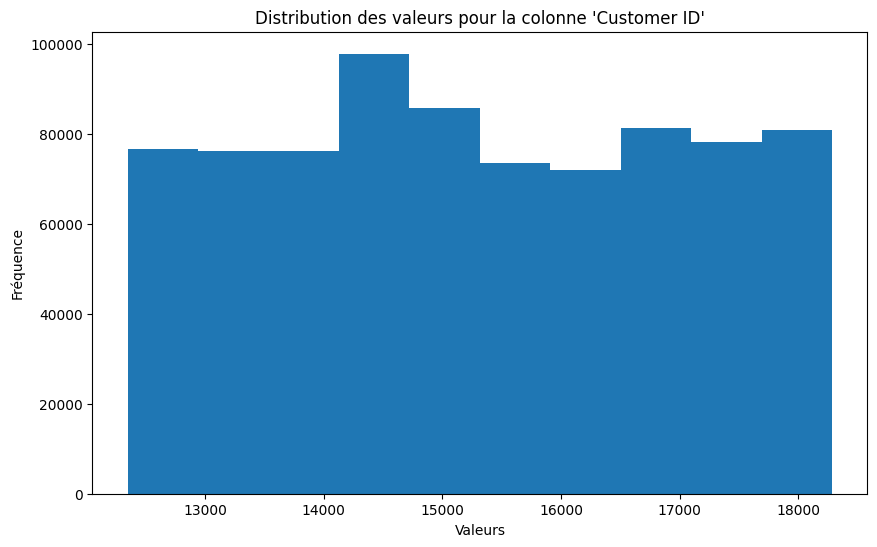

Résumé pour la colonne 'Country':
count             797885
unique                41
top       United Kingdom
freq              716115
Name: Country, dtype: object
---------------------------------------------


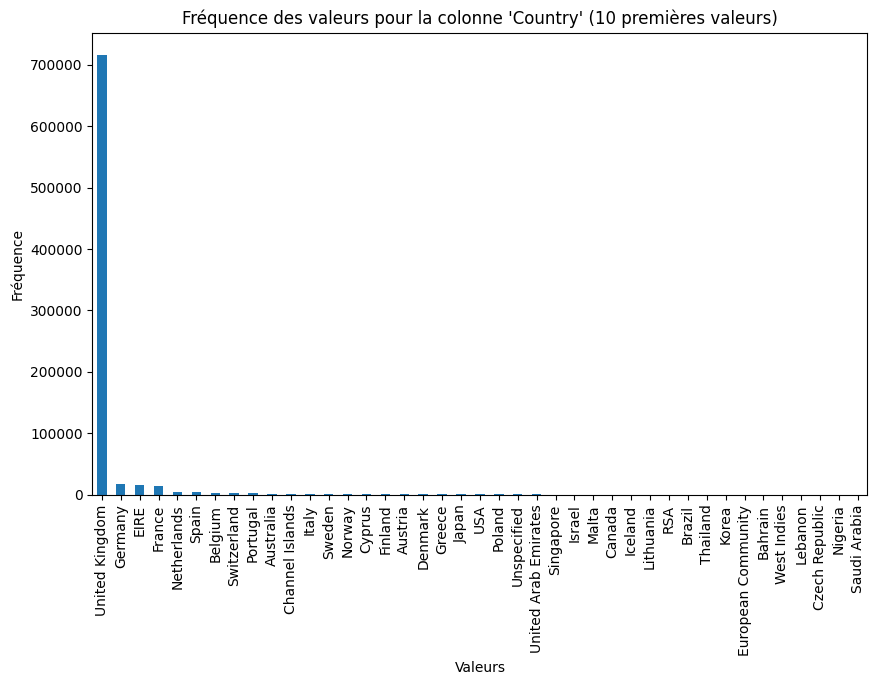

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données dans un DataFrame pandas
data = pd.read_csv('base_trie.csv')

# Itérer sur chaque colonne du DataFrame
for column in data.columns:
    # Résumé des données (étape 1)
    summary = data[column].describe()
    print(f"Résumé pour la colonne '{column}':")
    print(summary)
    print("---------------------------------------------")

    # Visualisation des données (étape 2)
    if data[column].dtype == 'object':
        # Pour les colonnes de type 'object' (chaînes de caractères)
        value_counts = data[column].value_counts()
        plt.figure(figsize=(10, 6))
        value_counts[:50].plot(kind='bar')
        plt.title(f"Fréquence des valeurs pour la colonne '{column}' (10 premières valeurs)")
        plt.xlabel("Valeurs")
        plt.ylabel("Fréquence")
        plt.show()
    else:
        # Pour les colonnes numériques
        plt.figure(figsize=(10, 6))
        plt.hist(data[column], bins=10)
        plt.title(f"Distribution des valeurs pour la colonne '{column}'")
        plt.xlabel("Valeurs")
        plt.ylabel("Fréquence")
        plt.show()


In [ ]:
import pandas as pd

# Charger les données dans un DataFrame pandas
data = pd.read_csv('votre_dataset.csv')

# Effectuer le groupby sur la colonne "Description" et calculer la somme des quantités
grouped_data = data.groupby('Description')['Quantity'].sum()

# Afficher les résultats
print(grouped_data)


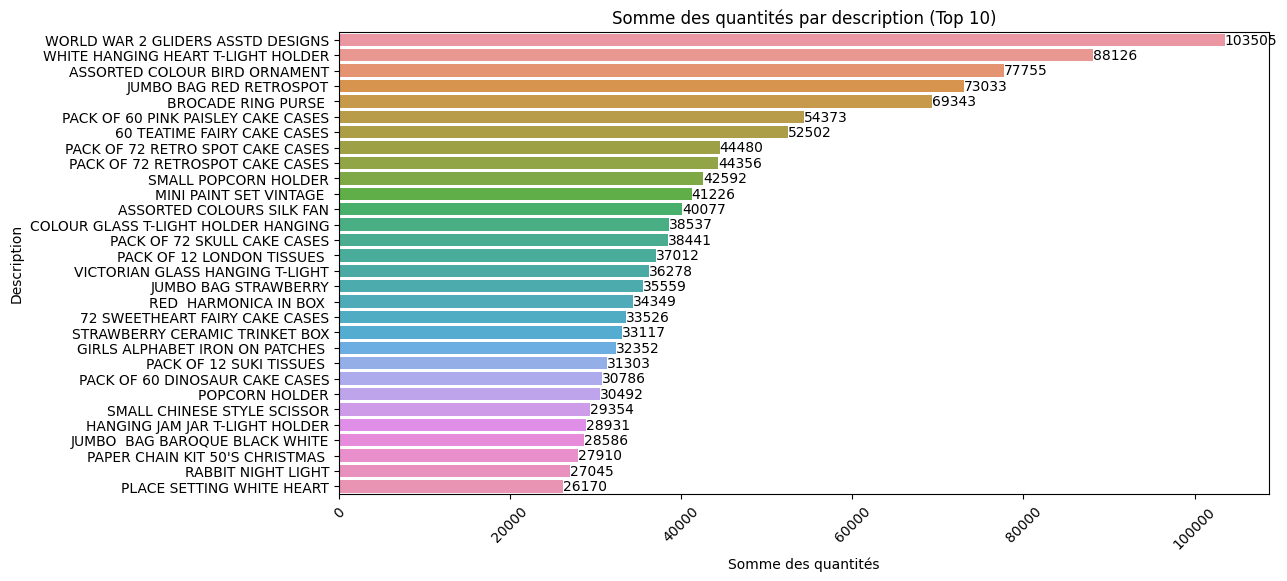

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données dans un DataFrame pandas
data = pd.read_csv('base_trie.csv')

# Effectuer le groupby sur la colonne "Description" et calculer la somme des quantités
grouped_data = data.groupby('Description')['Quantity'].sum().reset_index()

# Trier les données groupées par ordre décroissant
grouped_data = grouped_data.sort_values(by='Quantity', ascending=False)

# Afficher un graphique à barres de la somme des quantités par description
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data.head(30), x='Quantity', y='Description')
plt.title("Somme des quantités par description (Top 10)")
plt.xlabel("Somme des quantités")
plt.ylabel("Description")
plt.xticks(rotation=45)

# Ajouter une indication sur la colonne "Customer ID"
for i, value in enumerate(grouped_data['Quantity'].head(30)):
    plt.text(value, i, f'{value}', va='center')

plt.show()


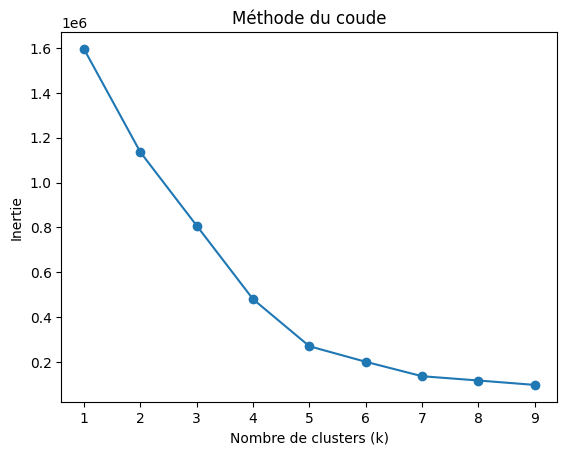

In [36]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Étape 1 : Charger les données et sélectionner les colonnes numériques
data = pd.read_csv("base_trie.csv")
numeric_columns = ["Quantity", "Price"]
numeric_data = data[numeric_columns]

# Étape 2 : Prétraitement des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Étape 3 : Choix du nombre de clusters en utilisant la méthode du coude
inertia = []
k_values = range(1, 10)  # Testez différents nombres de clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Tracer le graphique de la méthode du coude
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()


<Axes: xlabel='Quantity', ylabel='Price'>

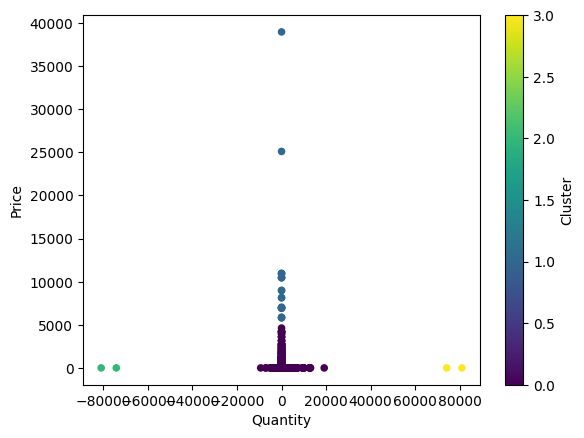

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Étape 1 : Charger les données et sélectionner les colonnes numériques
data = pd.read_csv("base_trie.csv")
numeric_columns = ["Quantity", "Price"]
numeric_data = data[numeric_columns]

# Étape 2 : Prétraitement des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Étape 3 : Choix du nombre de clusters
# Utilisez une méthode comme la méthode du coude ou l'analyse de la silhouette pour trouver le nombre optimal de clusters

# Étape 4 : Appliquer l'algorithme de K-means
k = 4  # Nombre de clusters choisi
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

# Visualisation des résultats (exemple avec deux colonnes numériques)
data["Cluster"] = cluster_labels
data.plot.scatter(x="Quantity", y="Price", c="Cluster", colormap="viridis")
